In [1]:
%%bash
git clone https://github.com/StonyBrookNLP/musique.git

Cloning into 'musique'...


In [2]:
%%bash
cd /kaggle/working/musique
bash download_data.sh

Archive:  musique_v1.0.zip
   creating: data/
  inflating: data/.DS_Store          
  inflating: data/musique_full_v1.0_train.jsonl  
  inflating: data/dev_test_singlehop_questions_v1.0.json  
  inflating: data/musique_ans_v1.0_test.jsonl  
  inflating: data/musique_full_v1.0_dev.jsonl  
  inflating: data/musique_ans_v1.0_train.jsonl  
  inflating: data/musique_full_v1.0_test.jsonl  
  inflating: data/musique_ans_v1.0_dev.jsonl  


+ pip install gdown
+ ZIP_NAME=musique_v1.0.zip
+ gdown --id 1tGdADlNjWFaHLeZZGShh2IRcpO6Lv24h --output musique_v1.0.zip
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1tGdADlNjWFaHLeZZGShh2IRcpO6Lv24h
From (redirected): https://drive.google.com/uc?id=1tGdADlNjWFaHLeZZGShh2IRcpO6Lv24h&confirm=t&uuid=15850704-989c-4dc9-a510-48e00b2701cd
To: /kaggle/working/musique/musique_v1.0.zip
100%|██████████| 272M/272M [00:13<00:00, 20.6MB/s]
++ basename musique_v1.0.zip
+ unzip musique_v1.0.zip
+ rm musique_v1.0.zip
+ rm -rf __MACOSX


In [3]:
import pandas as pd

test_json='/kaggle/working/musique/data/musique_ans_v1.0_test.jsonl'

test_data=pd.read_json(test_json, lines=True)
test_data.shape

(2459, 3)

In [4]:
test_data.head()

,id,paragraphs,question
0,2hop__55254_176500,"[{'idx': 0, 'title': 'Scarecrow (Oz)', 'paragr...",Who is the spouse of krusty the clown's voice ...
1,2hop__421982_677154,"[{'idx': 0, 'title': 'Ann Arbor, Michigan', 'p...",What team is Joumana Kidd's spouse on?
2,2hop__680867_826659,"[{'idx': 0, 'title': 'William Walker (diplomat...",What is the employer of William Walker part of?
3,2hop__528695_461025,"[{'idx': 0, 'title': 'That's All Right', 'para...",What is the record label of Legend of the Blac...
4,2hop__543484_790947,"[{'idx': 0, 'title': 'Sapphire Princess', 'par...",Where was Princess Charming's composer educated?


In [5]:
test_data.iloc[0]['paragraphs'][:2]

[{'idx': 0,
  'title': 'Scarecrow (Oz)',
  'paragraph_text': "The Scarecrow Oz character Illustration by W.W. Denslow from The Wonderful Wizard of Oz First appearance The Wonderful Wizard of Oz (1900) Created by L. Frank Baum Portrayed by Ray Bolger Voiced by Paul Scheer (Once Upon a Time) Information Aliases Socrates Strawman Chang Wang Woe Fiyero Tigelaar Species Scarecrow Gender Male Occupation Ruler of Oz Tin Woodman's treasurer Corn farmer Title His Majesty the Scarecrow Royal Treasurer Emperor of the Silver Islands Spouse (s) Tsing Tsing (in his former incarnation) Children 3 sons 15 grandsons (from his former incarnation)"},
 {'idx': 1,
  'title': 'Fallout 4',
  'paragraph_text': "The player assumes control of a character referred to as the ``Sole Survivor '', who emerges from a long - term cryogenic stasis in Vault 111, an underground nuclear fallout shelter. After witnessing the murder of their spouse and kidnapping of their son, the Sole Survivor ventures out into the Commonw

# Making Multiple Reasoning Paths

In [6]:
ans=pd.read_json('/kaggle/working/musique/data/musique_ans_v1.0_dev.jsonl', lines=True)
ans.head(5)

,id,paragraphs,question,question_decomposition,answer,answer_aliases,answerable
0,2hop__460946_294723,"[{'idx': 0, 'title': 'Grant's First Stand', 'p...",Who is the spouse of the Green performer?,"[{'id': 460946, 'question': 'Green >> performe...",Miquette Giraudy,[],True
1,2hop__252311_366220,"[{'idx': 0, 'title': 'SICRAL 1B', 'paragraph_t...",Who founded the company that distributed the f...,"[{'id': 252311, 'question': 'UHF >> distribute...",Mike Medavoy,[],True
2,2hop__701895_752697,"[{'idx': 0, 'title': 'Pangi Territory', 'parag...",What administrative territorial entity is the ...,"[{'id': 701895, 'question': 'Ciudad Deportiva ...",Tamaulipas,[],True
3,2hop__259228_793698,"[{'idx': 0, 'title': 'Richmond, Virginia', 'pa...",Where is Ulrich Walter's employer headquartered?,"[{'id': 259228, 'question': 'Ulrich Walter >> ...",Cologne,[],True
4,2hop__481349_302087,"[{'idx': 0, 'title': 'Market Square (High Poin...",Which company owns the manufacturer of Learjet...,"[{'id': 481349, 'question': 'Learjet 60 >> man...",Bombardier Inc.,[Bombardier],True


In [7]:
ans=ans.head(1200)

In [8]:
first_ans=ans.iloc[0]
print(first_ans['question'])
print(first_ans['question_decomposition'])

Who is the spouse of the Green performer?
[{'id': 460946, 'question': 'Green >> performer', 'answer': 'Steve Hillage', 'paragraph_support_idx': 10}, {'id': 294723, 'question': '#1 >> spouse', 'answer': 'Miquette Giraudy', 'paragraph_support_idx': 5}]


In [9]:
print(first_ans['paragraphs'])

[{'idx': 0, 'title': "Grant's First Stand", 'paragraph_text': 'Grant\'s First Stand is the debut album by American jazz guitarist Grant Green featuring performances by Green recorded and released on the Blue Note label in 1961. Earlier recordings made by Green for Blue Note were released as "First Session" in 2001.', 'is_supporting': False}, {'idx': 1, 'title': 'List of show business families', 'paragraph_text': 'Actress / director / singer Phylicia Rashād is the older sister of performer Debbie Allen, who is married to former NBA basketball player, Norm Nixon. Phylicia Rashād is the former spouse of both Victor Willis, former lead singer of the group Village People, and former NFL football player turned sportscaster, Ahmad Rashād. Phylicia and Ahmad Rashād are the parents of actress Condola Rashād.', 'is_supporting': False}, {'idx': 2, 'title': 'Green', 'paragraph_text': 'For the ancient Egyptians, green had very positive associations. The hieroglyph for green represented a growing pa

In [10]:
# Step 1: Extract the relevant paragraphs using paragraph_support_idx from the question decomposition
def extract_relevant_paragraphs(decomposition, paragraphs):
    context = []
    
    # For each decomposition part, extract the relevant paragraph based on paragraph_support_idx
    for item in decomposition:
        # Get the paragraph index
        paragraph_idx = item['paragraph_support_idx']
        
        # Find the paragraph by matching the idx
        relevant_paragraph = next((p for p in paragraphs if p['idx'] == paragraph_idx), None)
        
        if relevant_paragraph:
            context.append(relevant_paragraph['paragraph_text'])
    
    return context

# Extract the relevant context for the question decomposition
# context = extract_relevant_paragraphs(first_ans['question_decomposition'], first_ans['paragraphs'])
# context

# Apply the function to the DataFrame
ans['evidence'] = ans.apply(lambda row: extract_relevant_paragraphs(row['question_decomposition'], row['paragraphs']), axis=1)

# Drop rows where evidence is None (if any other checks are necessary)
ans = ans.dropna(subset=['evidence'])
ans.shape

(1200, 8)

In [11]:
from typing import Optional, List, Dict
from pydantic import BaseModel

class Entity(BaseModel):
    id: str
    paragraphs: List[Dict]
    question: str
    question_decomposition: List[Dict]
    answer: str
    answer_aliases: List[str]
    answerable: bool
    evidence: List[str]
    

class ReasoningPath(BaseModel):
    question: str
    evidence: str
    reason: str
    answer: str
    ground_truth: str
    temperature: float
    tokens: int
    score: float

entities = [Entity.model_validate(row) for row in ans.to_dict(orient='records')]
print(len(entities))

1200


In [12]:
entities[0].evidence

['Green is the fourth studio album by British progressive rock musician Steve Hillage. Written in spring 1977 at the same time as his previous album, the funk-inflected "Motivation Radio" (1977), "Green" was originally going to be released as "The Green Album" as a companion to "The Red Album" (the originally intended name for "Motivation Radio"). However, this plan was dropped and after a US tour in late 1977, "Green" was recorded alone, primarily in Dorking, Surrey, and in London.',
 'Miquette Giraudy (born 9 February 1953, Nice, France) is a keyboard player and vocalist, best known for her work in Gong and with her partner Steve Hillage. She and Hillage currently form the core of the ambient band System 7. In addition to her performances in music, she has also worked as an actress, film editor and writer. In each role, she has used different stage names.']

In [13]:
import re
from sot.sot import SoT
from typing import Tuple, Union
from doraemon.logger_util import get_logger
from doraemon.inference_factory import InferenceFactory

logger=get_logger(name=__name__, logfile="musique_dataset_builder.log")

def get_answer(raw_answer: str)-> str:
    answer=re.search(r"\\boxed\{(.*?)\}", raw_answer)
    if answer:
        return answer.group(1)
    return "None"
    

def process_entity(args)-> Optional[Tuple[ReasoningPath, int]]:
    """
    """
    et,paradigm,temperature=args

    try:
        evidence_str = "\n".join(et.evidence)
        prompt=SoT.get_initialized_prompt(paradigm=paradigm, question=f"Context:{evidence_str}\nQuestion:{et.question}")

        r_s, tokens=InferenceFactory.inference(logger=logger, messages=prompt, temperature=temperature)
        logger.info(r_s)
        result=ReasoningPath(
            question=str(et.question), 
            evidence=evidence_str,
            reason=str(r_s), 
            answer=get_answer(r_s),
            ground_truth=str(et.answer),
            temperature=float(temperature), 
            tokens=int(tokens), 
            score=0.0)
        return result, tokens
    except Exception as e:
        logger.error(f"Error processing quetion {et.question} at temperature {temperature} with exception {e}")
        return None


paradigm = SoT.classify_question(entities[0].question)
logger.info(paradigm)
assert "conceptual_chaining"==str(paradigm)

2025-06-06 09:51:37.941008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749203498.217926      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749203498.320682      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

2025-06-06 09:52:02,037 INFO conceptual_chaining


In [14]:
temperatures = [i * 0.25 for i in range(9)]  # [0.0, 0.25, 0.5, ... ,2.0]

tasks=[]
for et in entities:
    for tp in temperatures:
        tasks.append((et,paradigm,tp))
tasks[0]

(Entity(id='2hop__460946_294723', paragraphs=[{'idx': 0, 'title': "Grant's First Stand", 'paragraph_text': 'Grant\'s First Stand is the debut album by American jazz guitarist Grant Green featuring performances by Green recorded and released on the Blue Note label in 1961. Earlier recordings made by Green for Blue Note were released as "First Session" in 2001.', 'is_supporting': False}, {'idx': 1, 'title': 'List of show business families', 'paragraph_text': 'Actress / director / singer Phylicia Rashād is the older sister of performer Debbie Allen, who is married to former NBA basketball player, Norm Nixon. Phylicia Rashād is the former spouse of both Victor Willis, former lead singer of the group Village People, and former NFL football player turned sportscaster, Ahmad Rashād. Phylicia and Ahmad Rashād are the parents of actress Condola Rashād.', 'is_supporting': False}, {'idx': 2, 'title': 'Green', 'paragraph_text': 'For the ancient Egyptians, green had very positive associations. The 

In [15]:
from tqdm import tqdm
import concurrent.futures

with concurrent.futures.ProcessPoolExecutor(max_workers=1) as executor:
    results=list(tqdm(executor.map(process_entity, tasks), total=len(tasks)))

  0%|          | 0/10800 [00:00<?, ?it/s]2025-06-06 09:52:03,826 INFO <think>
Let’s think through this step by step
#Green_performer → #Steve_Hillage → spouse
</think>
\boxed{Miquette Giraudy}
  0%|          | 1/10800 [00:00<1:40:13,  1.80it/s]2025-06-06 09:52:04,257 INFO <think>
Let’s think through this step by step
#Green_performer → #Steve_Hillage → spouse
</think>
\boxed{Miquette Giraudy}
  0%|          | 2/10800 [00:00<1:26:20,  2.08it/s]2025-06-06 09:52:04,664 INFO <think>
Let’s think through this step by step
#Green_performer → #Steve_Hillage → spouse
</think>
\boxed{Miquette Giraudy}
  0%|          | 3/10800 [00:01<1:20:21,  2.24it/s]2025-06-06 09:52:05,089 INFO <think>
Let’s think through this step by step
#Green_performer → #Steve_Hillage → spouse
</think>
\boxed{Miquette Giraudy}
  0%|          | 4/10800 [00:01<1:18:47,  2.28it/s]2025-06-06 09:52:05,499 INFO <think>
Let’s think through this step by step
#Steve_Hillage → #Miquette_Giraudy
</think>
\boxed{Miquette Giraudy}
  0

In [16]:
from typing import List

multipleReasonPaths: List[ReasoningPath]=[]

for rs_token in results:
    if rs_token is not None:
        reason_path,_=rs_token
        multipleReasonPaths.append(reason_path)

len(multipleReasonPaths)

10689

In [17]:
logger.info(multipleReasonPaths[0])
logger.info(multipleReasonPaths[0].answer)

2025-06-06 13:04:23,182 INFO question='Who is the spouse of the Green performer?' evidence='Green is the fourth studio album by British progressive rock musician Steve Hillage. Written in spring 1977 at the same time as his previous album, the funk-inflected "Motivation Radio" (1977), "Green" was originally going to be released as "The Green Album" as a companion to "The Red Album" (the originally intended name for "Motivation Radio"). However, this plan was dropped and after a US tour in late 1977, "Green" was recorded alone, primarily in Dorking, Surrey, and in London.\nMiquette Giraudy (born 9 February 1953, Nice, France) is a keyboard player and vocalist, best known for her work in Gong and with her partner Steve Hillage. She and Hillage currently form the core of the ambient band System 7. In addition to her performances in music, she has also worked as an actress, film editor and writer. In each role, she has used different stage names.' reason='<think>\nLet’s think through this 

In [18]:
import pickle
from datetime import datetime
from datasets import Dataset

def convert_rp_to_ds(multipleReasonPaths: List[ReasoningPath]) -> Dataset:
    data_dicts = [rp.model_dump() for rp in multipleReasonPaths]
    # Create a Dataset from the list of dictionaries
    return Dataset.from_list(data_dicts)

def to_pkl(ds: Dataset, filename: str):
    with open(filename, 'wb') as f:
        pickle.dump(ds, f)


ds:Dataset=convert_rp_to_ds(multipleReasonPaths)

to_pkl(ds, filename=f"musique-sots-dataset.pkl")

In [19]:
df = ds.to_pandas()
df.head(9)

,question,evidence,reason,answer,ground_truth,temperature,tokens,score
0,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,0.00,37,0.0
1,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,0.25,37,0.0
2,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,0.50,37,0.0
3,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,0.75,37,0.0
4,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,1.00,39,0.0
5,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,1.25,39,0.0
6,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,1.50,43,0.0
7,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,1.75,39,0.0
8,Who is the spouse of the Green performer?,Green is the fourth studio album by British pr...,<think>\nLet’s think through this step by step...,Miquette Giraudy,Miquette Giraudy,2.00,41,0.0


In [20]:
!rm -rf /kaggle/working/musique

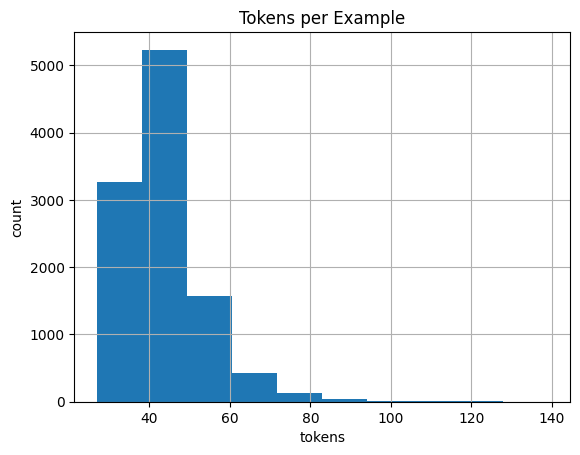

In [21]:
import matplotlib.pyplot as plt

# Tokens distribution
plt.figure()
df['tokens'].hist()
plt.title("Tokens per Example")
plt.xlabel("tokens")
plt.ylabel("count")
plt.show()